In [41]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
data = pd.read_excel('Clustering_Clean_Ads_Data.xlsx')

In [3]:
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
data.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [7]:
# check for null values
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [8]:
# check for duplicate values
data.duplicated().sum()

0

In [9]:
# treat missing values with their mean
def calculate_cpc(x):
    spend=data.Spend
    clicks=data.Clicks
    cpc=(spend/clicks)
    return cpc
def calculate_ctr(x):
    clicks=data.Clicks
    impressions=data.Impressions
    ctr=(clicks/(impressions)*100)
    return ctr
def calculate_cpm(x):
    spend=data.Spend
    impressions=data.Impressions
    cpm=(spend/(impressions)*1000)
    return cpm

data["CPC"]=data[["CPC"]].apply(lambda x:calculate_cpc(x))
data["CPM"]=data[["CPM"]].apply(lambda x:calculate_cpm(x))
data["CTR"]=data[["CTR"]].apply(lambda x:calculate_ctr(x))

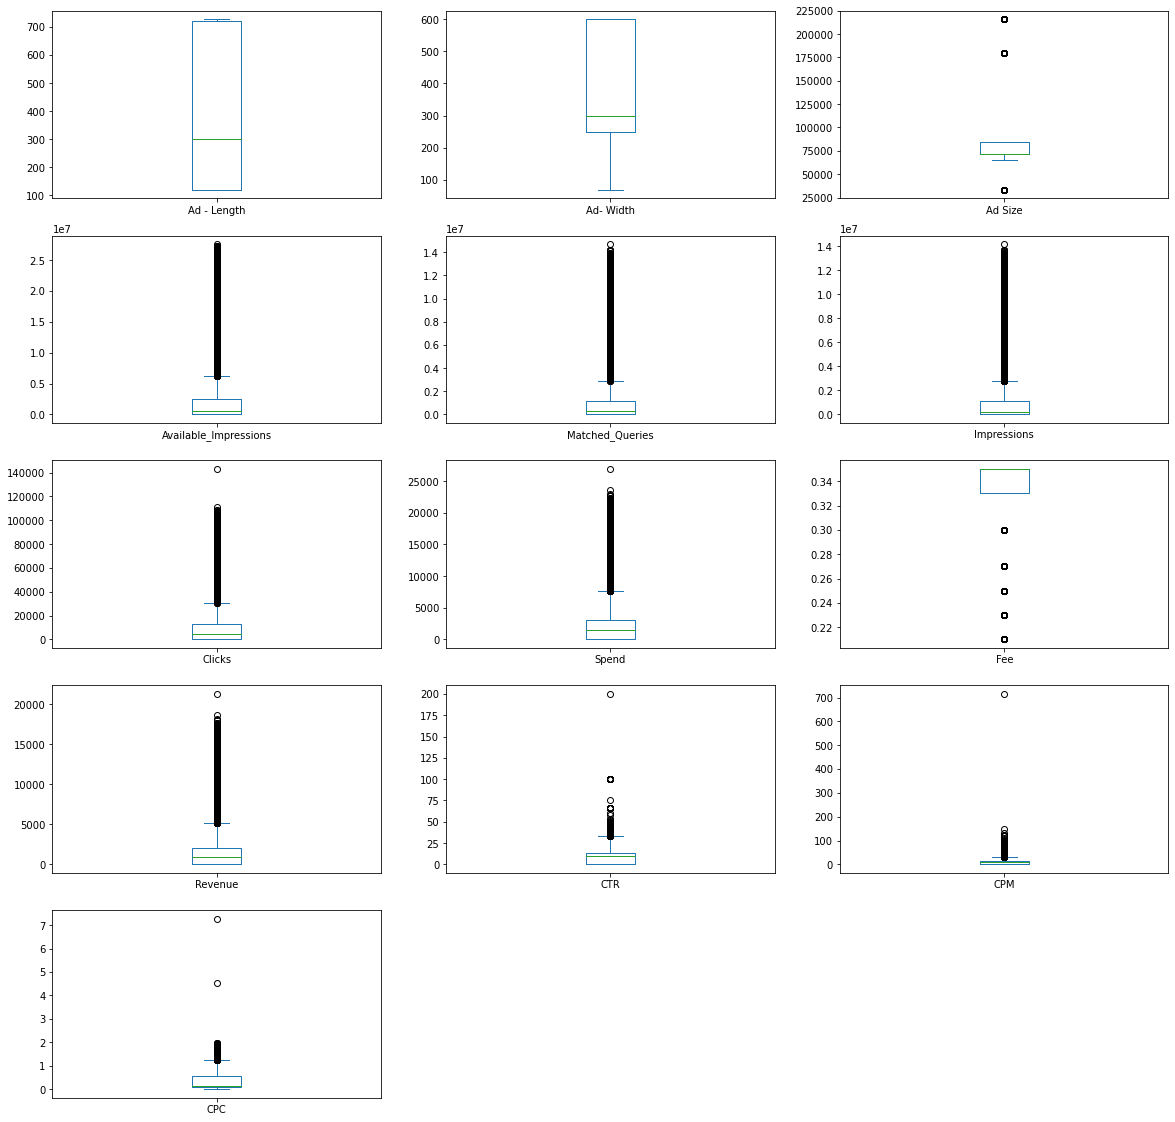

In [10]:
# check for outliers
data.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(20,20));

In [11]:
# treat outliers
def treat_outliers(data, col1, col2, col3):
    data[col1] = data[col1].clip(upper=data[col1].quantile(0.99))
    data[col2] = data[col2].clip(upper=data[col2].quantile(0.99))
    data[col3] = data[col3].clip(upper=data[col3].quantile(0.99))
    data[col1] = data[col1].clip(upper=data[col1].quantile(0.01))
    data[col2] = data[col2].clip(upper=data[col2].quantile(0.01))
    data[col3] = data[col3].clip(upper=data[col3].quantile(0.01))
    return data
treat_outliers(data, 'CPC', 'CTR', 'CPM')

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.115287,0.000000,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.115287,0.000000,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.115287,0.000000,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.115287,0.000000,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.115287,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,0.115287,0.854884,0.03
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,0.115287,0.854884,0.03
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,0.115287,0.854884,0.03
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,0.115287,0.854884,0.03


In [12]:
# z-score scaling
scaler = StandardScaler()
data1=data.copy()
data1.drop(["Ad Type","Platform","Device Type","Format","InventoryType","Timestamp","CTR","CPM","CPC"],axis=1,inplace=True)
scaler.fit(data1)
data_scaled = scaler.transform(data1)

In [13]:
data_scaled

array([[-0.3644957 , -0.43279676, -0.3522185 , ..., -0.66537187,
         0.46544737, -0.61969285],
       [-0.3644957 , -0.43279676, -0.3522185 , ..., -0.66537187,
         0.46544737, -0.61969285],
       [-0.3644957 , -0.43279676, -0.3522185 , ..., -0.66537187,
         0.46544737, -0.61969285],
       ...,
       [ 1.43309269, -0.18659865,  1.93908609, ..., -0.66535957,
         0.46544737, -0.61968238],
       [-1.13489073,  1.29058999, -0.40096966, ..., -0.66535466,
         0.46544737, -0.6196782 ],
       [ 1.43309269, -0.18659865,  1.93908609, ..., -0.66534974,
         0.46544737, -0.61967401]])

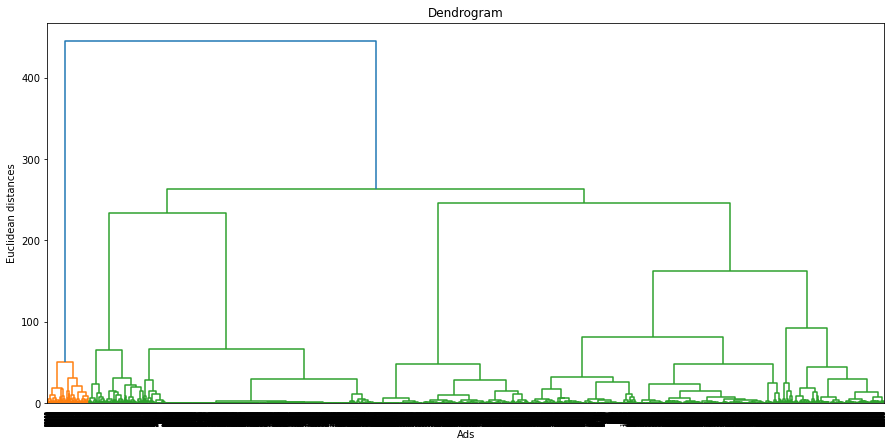

In [14]:
wardlink = linkage(data_scaled, method = 'ward')
plt.figure(figsize=(15,7))
dend = dendrogram(wardlink)
plt.title('Dendrogram')
plt.xlabel('Ads')
plt.ylabel('Euclidean distances')
plt.show()

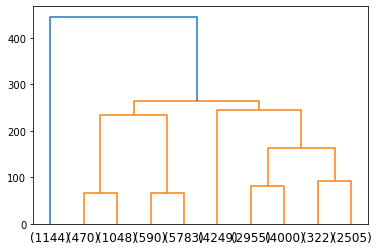

In [15]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [16]:
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([5, 5, 5, ..., 4, 3, 4], dtype=int32)

In [17]:
data["clusters"]= clusters

In [18]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.labels_
k_means.inertia_

125497.30586644114

In [22]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
k_means.inertia_

91790.28445801776

In [23]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
k_means.inertia_

62001.19216720901

In [24]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_scaled)
k_means.inertia_

34259.70321596667

In [25]:
k_means = KMeans(n_clusters = 6)
k_means.fit(data_scaled)
k_means.inertia_

23073.31516066327

In [26]:
k_means = KMeans(n_clusters = 7)
k_means.fit(data_scaled)
k_means.inertia_

19781.05875445853

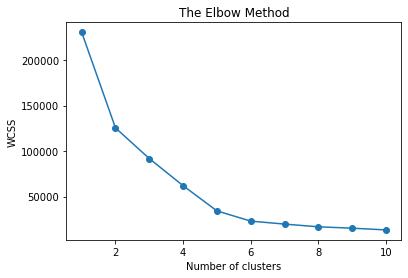

In [27]:
# elbow plot
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
k_means = KMeans(n_clusters = 5)
k_means.fit(data_scaled)
labels = k_means.labels_

In [29]:
data["Clus_kmeans"] = labels
data.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1


In [30]:
silhouette_score(data_scaled,labels)

0.6081341097563603

In [31]:
sil_width = silhouette_samples(data_scaled,labels)

In [32]:
data["sil_width"] = sil_width
data.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans,sil_width
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1,0.115790
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1,0.115785
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1,0.115819
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1,0.115826
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,1,0.0,0.35,0.0,0.115287,0.0,0.0,5,1,0.115763


In [33]:
# silhouette score
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6760595618038074
For n_clusters=3, The Silhouette Coefficient is 0.415349777837397
For n_clusters=4, The Silhouette Coefficient is 0.4962685652396748
For n_clusters=5, The Silhouette Coefficient is 0.6081341097563603
For n_clusters=6, The Silhouette Coefficient is 0.641803463745478
For n_clusters=7, The Silhouette Coefficient is 0.6348501005189309
For n_clusters=8, The Silhouette Coefficient is 0.6335157911798877
For n_clusters=9, The Silhouette Coefficient is 0.6536047760608464
For n_clusters=10, The Silhouette Coefficient is 0.6518806210548183


In [34]:
# profile the ads based on optimum number of clusters
# k = 3

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
data['cluster'] = kmeans.labels_
data.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})

,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,14040.140452,1550.940763,1097.176480,0.854816,0.115266,0.029975
1,18634.633700,16219.585956,12445.488253,0.854884,0.115287,0.030000
2,8018.828005,2027.579014,1354.873585,0.843198,0.115145,0.029707


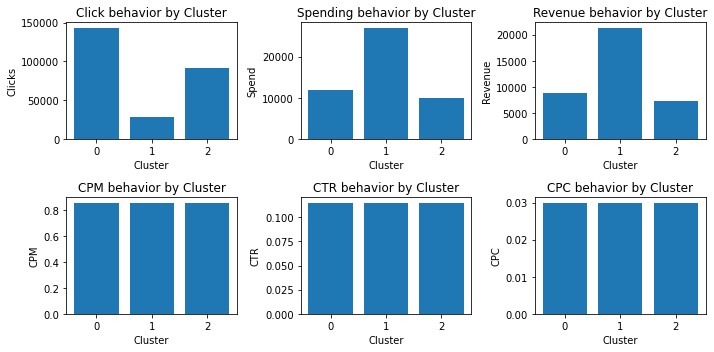

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.bar(data['cluster'], data['Clicks'])
plt.xlabel('Cluster')
plt.ylabel('Clicks')
plt.title('Click behavior by Cluster')

plt.subplot(2,3,2)
plt.bar(data['cluster'], data['Spend'])
plt.xlabel('Cluster')
plt.ylabel('Spend')
plt.title('Spending behavior by Cluster')

plt.subplot(2,3,3)
plt.bar(data['cluster'], data['Revenue'])
plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.title('Revenue behavior by Cluster')

plt.subplot(2,3,4)
plt.bar(data['cluster'], data['CPM'])
plt.xlabel('Cluster')
plt.ylabel('CPM')
plt.title('CPM behavior by Cluster')

plt.subplot(2,3,5)
plt.bar(data['cluster'], data['CTR'])
plt.xlabel('Cluster')
plt.ylabel('CTR')
plt.title('CTR behavior by Cluster')

plt.subplot(2,3,6)
plt.bar(data['cluster'], data['CPC'])
plt.xlabel('Cluster')
plt.ylabel('CPC')
plt.title('CPC behavior by Cluster')

plt.tight_layout()
plt.show()


In [37]:
# k = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
data['cluster'] = kmeans.labels_
data.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})

,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,4045.987297,1533.562825,1024.769797,0.844696,0.115167,0.029739
1,18175.196065,15922.138665,12203.684769,0.854884,0.115287,0.030000
2,14167.385790,1226.985594,799.120708,0.854796,0.115236,0.029977
3,70522.903803,7430.389687,5361.009788,0.854884,0.115287,0.030000


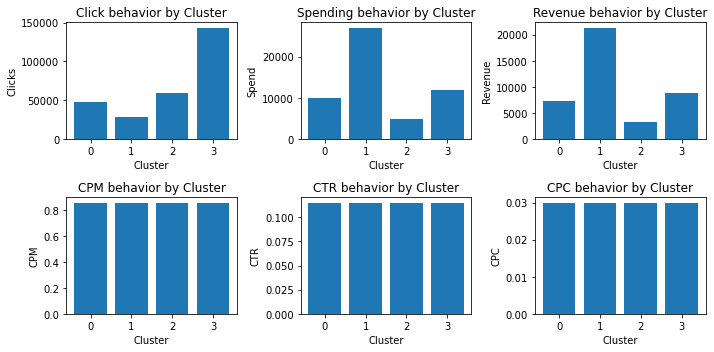

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.bar(data['cluster'], data['Clicks'])
plt.xlabel('Cluster')
plt.ylabel('Clicks')
plt.title('Click behavior by Cluster')

plt.subplot(2,3,2)
plt.bar(data['cluster'], data['Spend'])
plt.xlabel('Cluster')
plt.ylabel('Spend')
plt.title('Spending behavior by Cluster')

plt.subplot(2,3,3)
plt.bar(data['cluster'], data['Revenue'])
plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.title('Revenue behavior by Cluster')

plt.subplot(2,3,4)
plt.bar(data['cluster'], data['CPM'])
plt.xlabel('Cluster')
plt.ylabel('CPM')
plt.title('CPM behavior by Cluster')

plt.subplot(2,3,5)
plt.bar(data['cluster'], data['CTR'])
plt.xlabel('Cluster')
plt.ylabel('CTR')
plt.title('CTR behavior by Cluster')

plt.subplot(2,3,6)
plt.bar(data['cluster'], data['CPC'])
plt.xlabel('Cluster')
plt.ylabel('CPC')
plt.title('CPC behavior by Cluster')

plt.tight_layout()
plt.show()

In [39]:
# k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
data['cluster'] = kmeans.labels_
data.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})

,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,70702.868066,7444.334160,5372.247735,0.854884,0.115287,0.030000
1,3114.669884,415.513977,273.072612,0.854803,0.115262,0.029970
2,14021.493528,1212.947383,789.959818,0.854795,0.115235,0.029976
3,18725.511817,16278.141256,12493.150241,0.854884,0.115287,0.030000
4,4867.082075,2353.233459,1579.350388,0.837981,0.115104,0.029586


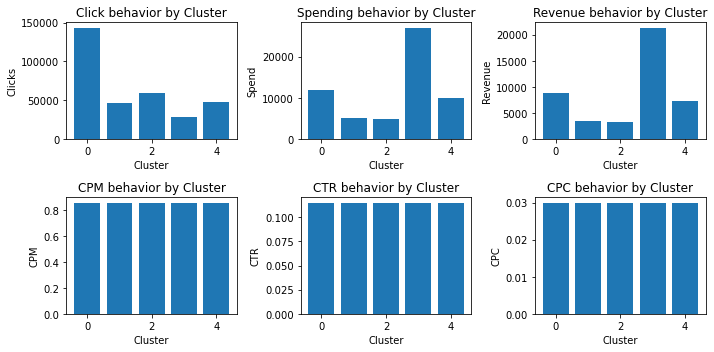

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
plt.bar(data['cluster'], data['Clicks'])
plt.xlabel('Cluster')
plt.ylabel('Clicks')
plt.title('Click behavior by Cluster')

plt.subplot(2,3,2)
plt.bar(data['cluster'], data['Spend'])
plt.xlabel('Cluster')
plt.ylabel('Spend')
plt.title('Spending behavior by Cluster')

plt.subplot(2,3,3)
plt.bar(data['cluster'], data['Revenue'])
plt.xlabel('Cluster')
plt.ylabel('Revenue')
plt.title('Revenue behavior by Cluster')

plt.subplot(2,3,4)
plt.bar(data['cluster'], data['CPM'])
plt.xlabel('Cluster')
plt.ylabel('CPM')
plt.title('CPM behavior by Cluster')

plt.subplot(2,3,5)
plt.bar(data['cluster'], data['CTR'])
plt.xlabel('Cluster')
plt.ylabel('CTR')
plt.title('CTR behavior by Cluster')

plt.subplot(2,3,6)
plt.bar(data['cluster'], data['CPC'])
plt.xlabel('Cluster')
plt.ylabel('CPC')
plt.title('CPC behavior by Cluster')

plt.tight_layout()
plt.show()

# PART 2

In [42]:
# read in the dataset
df = pd.read_excel('PCA_India_Data_Census.xlsx')

In [43]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [44]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [45]:
df.shape

(640, 61)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [48]:
# check for null values
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [49]:
# check for duplicate values
df.duplicated().sum()

0

In [50]:
#Which state has the highest gender ratio, and which has the lowest?
State_wise = df.groupby(['State']).agg({'TOT_M': 'sum', 'TOT_F': 'sum','TOT_WORK_M': 'sum', 'TOT_WORK_F': 'sum', 'No_HH': 'sum'})
State_wise['gender_ratio'] = State_wise['TOT_M'] / State_wise['TOT_F']
State_wise.sort_values(by='gender_ratio', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
State,,,,,,
Lakshadweep,12823,14772,5115,1780,4445,0.868061
Haryana,1167816,1498873,531409,347837,565971,0.779129
NCT of Delhi,833414,1075266,427622,206399,394821,0.775077
Uttar Pradesh,9043969,12023885,3710433,2972243,4006871,0.752167
Meghalaya,268036,356355,116787,149208,126845,0.752160
Bihar,4025198,5405883,1524553,1464147,1974627,0.744596
Punjab,1579405,2121425,786483,386766,796030,0.744502
Jammu & Kashmir,421213,572959,168768,129403,203645,0.735154
Daman & Diu,13153,18706,6884,4005,7455,0.703143


In [51]:
#Which area has the highest gender ratio, and which has the lowest?
Area_wise = df.groupby(['Area Name']).agg({'TOT_M': 'sum', 'TOT_F': 'sum','TOT_WORK_M': 'sum', 'TOT_WORK_F': 'sum', 'No_HH': 'sum'})
Area_wise['gender_ratio'] = Area_wise['TOT_M'] / Area_wise['TOT_F']
Area_wise.sort_values(by='gender_ratio', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
Area Name,,,,,,
Lakshadweep,12823,14772,5115,1780,4445,0.868061
Badgam,19585,23102,6982,4200,6218,0.847762
Mahamaya Nagar,67258,79378,30629,17018,27728,0.847313
Dhaulpur,31904,37671,15679,15274,15153,0.846911
Baghpat,54807,64937,24649,12429,21966,0.844003
...,...,...,...,...,...,...
Baudh,8672,19209,4295,10319,10665,0.451455
West Godavari,123111,273534,66492,116180,163437,0.450076
Virudhunagar,66704,148445,38587,76432,90241,0.449352


In [52]:
State_wise.sort_values(by='TOT_M', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
State,,,,,,
Uttar Pradesh,9043969,12023885,3710433,2972243,4006871,0.752167
Maharashtra,4196130,7138557,2028630,2918694,3136214,0.587812
Bihar,4025198,5405883,1524553,1464147,1974627,0.744596
West Bengal,3912553,6016118,2187371,1737825,2615284,0.650345
Karnataka,3409482,5345675,1932842,2191898,2268615,0.637802
Andhra Pradesh,3274363,6097235,1674517,2833719,3127287,0.537024
Tamil Nadu,3074009,5610310,1724274,2441679,2964700,0.547921
Kerala,2919825,4856357,1318975,917275,1982663,0.601238
Madhya Pradesh,2155608,3369745,1004639,1412107,1503764,0.639695


In [53]:
State_wise.sort_values(by='TOT_F', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
State,,,,,,
Uttar Pradesh,9043969,12023885,3710433,2972243,4006871,0.752167
Maharashtra,4196130,7138557,2028630,2918694,3136214,0.587812
Andhra Pradesh,3274363,6097235,1674517,2833719,3127287,0.537024
West Bengal,3912553,6016118,2187371,1737825,2615284,0.650345
Tamil Nadu,3074009,5610310,1724274,2441679,2964700,0.547921
Bihar,4025198,5405883,1524553,1464147,1974627,0.744596
Karnataka,3409482,5345675,1932842,2191898,2268615,0.637802
Kerala,2919825,4856357,1318975,917275,1982663,0.601238
Madhya Pradesh,2155608,3369745,1004639,1412107,1503764,0.639695


In [54]:
State_wise.sort_values(by='TOT_WORK_M', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
State,,,,,,
Uttar Pradesh,9043969,12023885,3710433,2972243,4006871,0.752167
West Bengal,3912553,6016118,2187371,1737825,2615284,0.650345
Maharashtra,4196130,7138557,2028630,2918694,3136214,0.587812
Karnataka,3409482,5345675,1932842,2191898,2268615,0.637802
Tamil Nadu,3074009,5610310,1724274,2441679,2964700,0.547921
Andhra Pradesh,3274363,6097235,1674517,2833719,3127287,0.537024
Bihar,4025198,5405883,1524553,1464147,1974627,0.744596
Kerala,2919825,4856357,1318975,917275,1982663,0.601238
Gujarat,1983685,2939472,1057781,918297,1235200,0.674844


In [55]:
State_wise.sort_values(by='TOT_WORK_F', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
State,,,,,,
Uttar Pradesh,9043969,12023885,3710433,2972243,4006871,0.752167
Maharashtra,4196130,7138557,2028630,2918694,3136214,0.587812
Andhra Pradesh,3274363,6097235,1674517,2833719,3127287,0.537024
Tamil Nadu,3074009,5610310,1724274,2441679,2964700,0.547921
Karnataka,3409482,5345675,1932842,2191898,2268615,0.637802
West Bengal,3912553,6016118,2187371,1737825,2615284,0.650345
Bihar,4025198,5405883,1524553,1464147,1974627,0.744596
Madhya Pradesh,2155608,3369745,1004639,1412107,1503764,0.639695
Rajasthan,2062563,2966496,882174,1127286,1177124,0.695286


In [56]:
State_wise.sort_values(by='No_HH', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
State,,,,,,
Uttar Pradesh,9043969,12023885,3710433,2972243,4006871,0.752167
Maharashtra,4196130,7138557,2028630,2918694,3136214,0.587812
Andhra Pradesh,3274363,6097235,1674517,2833719,3127287,0.537024
Tamil Nadu,3074009,5610310,1724274,2441679,2964700,0.547921
West Bengal,3912553,6016118,2187371,1737825,2615284,0.650345
Karnataka,3409482,5345675,1932842,2191898,2268615,0.637802
Kerala,2919825,4856357,1318975,917275,1982663,0.601238
Bihar,4025198,5405883,1524553,1464147,1974627,0.744596
Madhya Pradesh,2155608,3369745,1004639,1412107,1503764,0.639695


In [57]:
Area_wise.sort_values(by='No_HH', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
Area Name,,,,,,
North Twenty Four Parganas,471482,725514,269422,176430,310450,0.649859
Mumbai Suburban,485417,750392,262638,227123,304502,0.646885
Thane,424759,706327,211026,255770,294698,0.601363
Bangalore,401545,664595,238323,257848,287841,0.604195
Malappuram,477790,739441,176853,62991,257239,0.646150
...,...,...,...,...,...,...
North District,1874,2779,952,1407,1111,0.674343
Lahul & Spiti,1207,2358,567,1444,1051,0.511874
Upper Siang,1187,2117,460,1192,929,0.560699


In [58]:
Area_wise.sort_values(by='TOT_M', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
Area Name,,,,,,
Mumbai Suburban,485417,750392,262638,227123,304502,0.646885
Malappuram,477790,739441,176853,62991,257239,0.646150
North Twenty Four Parganas,471482,725514,269422,176430,310450,0.649859
Thane,424759,706327,211026,255770,294698,0.601363
Bangalore,401545,664595,238323,257848,287841,0.604195
...,...,...,...,...,...,...
Nicobars,1549,2630,715,1031,1275,0.588973
Lahul & Spiti,1207,2358,567,1444,1051,0.511874
Upper Siang,1187,2117,460,1192,929,0.560699


In [59]:
Area_wise.sort_values(by='TOT_F', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
Area Name,,,,,,
Mumbai Suburban,485417,750392,262638,227123,304502,0.646885
Malappuram,477790,739441,176853,62991,257239,0.646150
North Twenty Four Parganas,471482,725514,269422,176430,310450,0.649859
Thane,424759,706327,211026,255770,294698,0.601363
Bangalore,401545,664595,238323,257848,287841,0.604195
...,...,...,...,...,...,...
Nicobars,1549,2630,715,1031,1275,0.588973
Lahul & Spiti,1207,2358,567,1444,1051,0.511874
Upper Siang,1187,2117,460,1192,929,0.560699


In [60]:
Area_wise.sort_values(by='TOT_WORK_M', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
Area Name,,,,,,
North Twenty Four Parganas,471482,725514,269422,176430,310450,0.649859
Mumbai Suburban,485417,750392,262638,227123,304502,0.646885
Bangalore,401545,664595,238323,257848,287841,0.604195
Barddhaman,381529,565766,214205,146860,240421,0.674358
Thane,424759,706327,211026,255770,294698,0.601363
...,...,...,...,...,...,...
Lahul & Spiti,1207,2358,567,1444,1051,0.511874
Kiphire,2054,3513,500,1886,1587,0.584685
Upper Siang,1187,2117,460,1192,929,0.560699


In [61]:
Area_wise.sort_values(by='TOT_WORK_F', ascending=False)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,No_HH,gender_ratio
Area Name,,,,,,
Bangalore,401545,664595,238323,257848,287841,0.604195
Thane,424759,706327,211026,255770,294698,0.601363
Pune,328137,579038,155846,230024,253330,0.566693
Mumbai Suburban,485417,750392,262638,227123,304502,0.646885
Mahbubnagar,219667,332221,114400,177185,140158,0.661207
...,...,...,...,...,...,...
Kargil,2784,4206,1002,1118,1320,0.661912
Yanam,2618,4659,1165,1061,2219,0.561923
Nicobars,1549,2630,715,1031,1275,0.588973


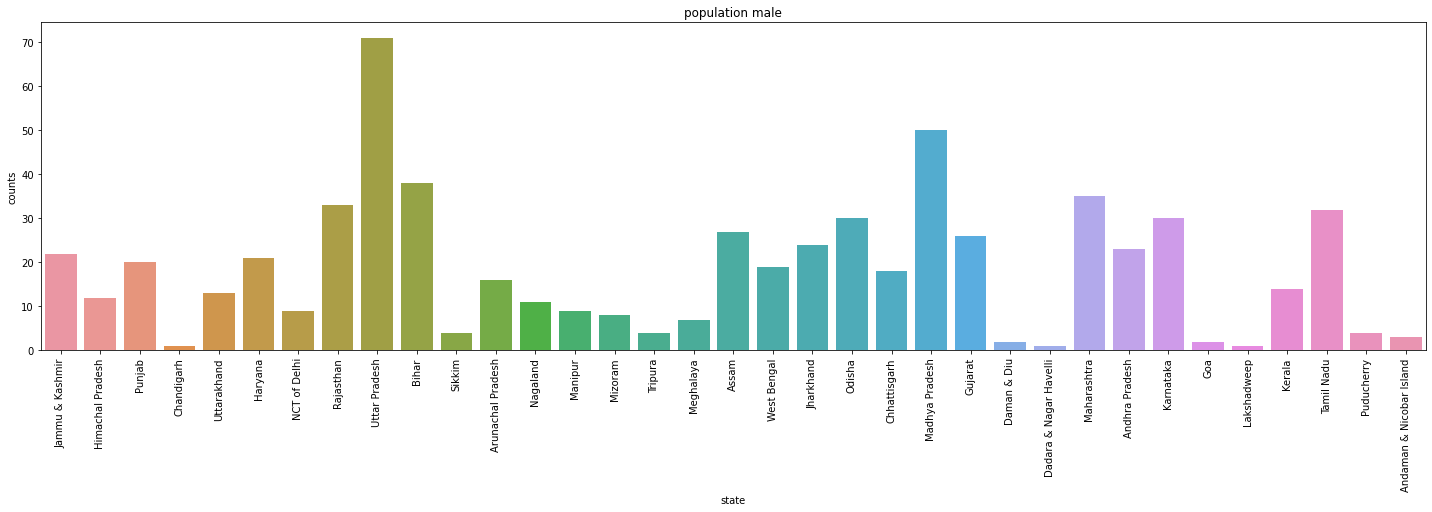

In [62]:
plt.figure(figsize=(20,7))
sns.countplot(data = df, x ='State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("population male")
plt.xlabel("state")
plt.ylabel("counts")
plt.show()

In [63]:
df["State"].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

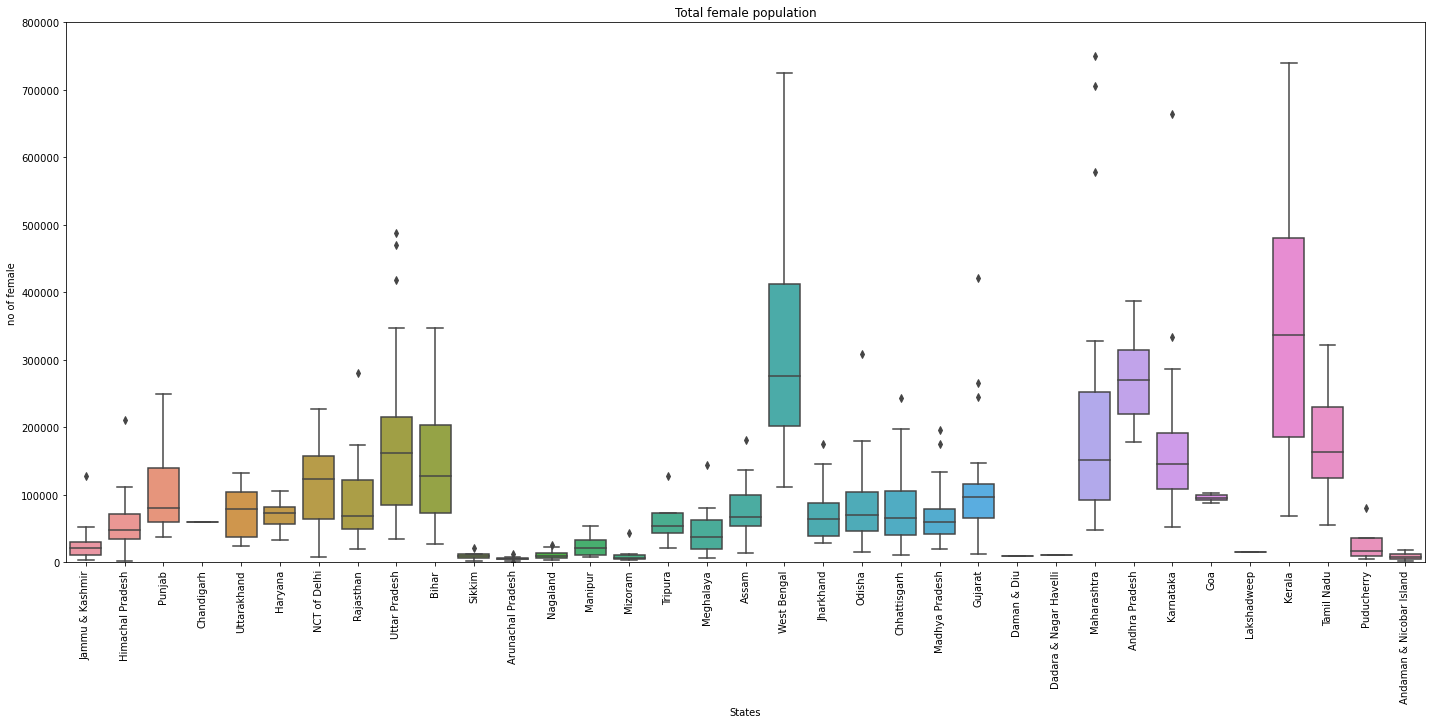

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(x='State',y='TOT_F',data=df)
plt.xticks(rotation=90)
plt.ylim(0,800000)
plt.tight_layout()
plt.title("Total female population")
plt.xlabel("States")
plt.ylabel("no of female")
plt.show()

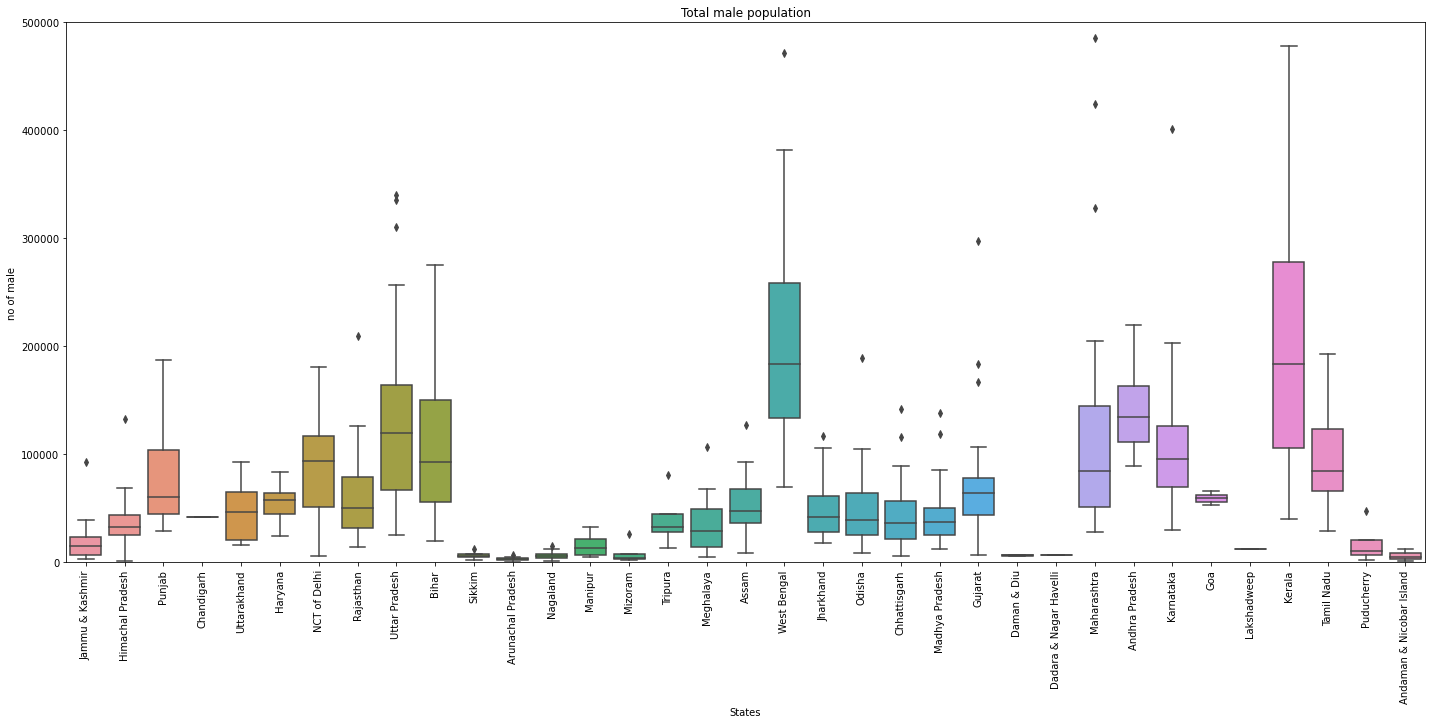

In [65]:
plt.figure(figsize=(20,10))
sns.boxplot(x='State',y='TOT_M',data=df)
plt.xticks(rotation=90)
plt.ylim(0,500000)
plt.tight_layout()
plt.title("Total male population")
plt.xlabel("States")
plt.ylabel("no of male")
plt.show()

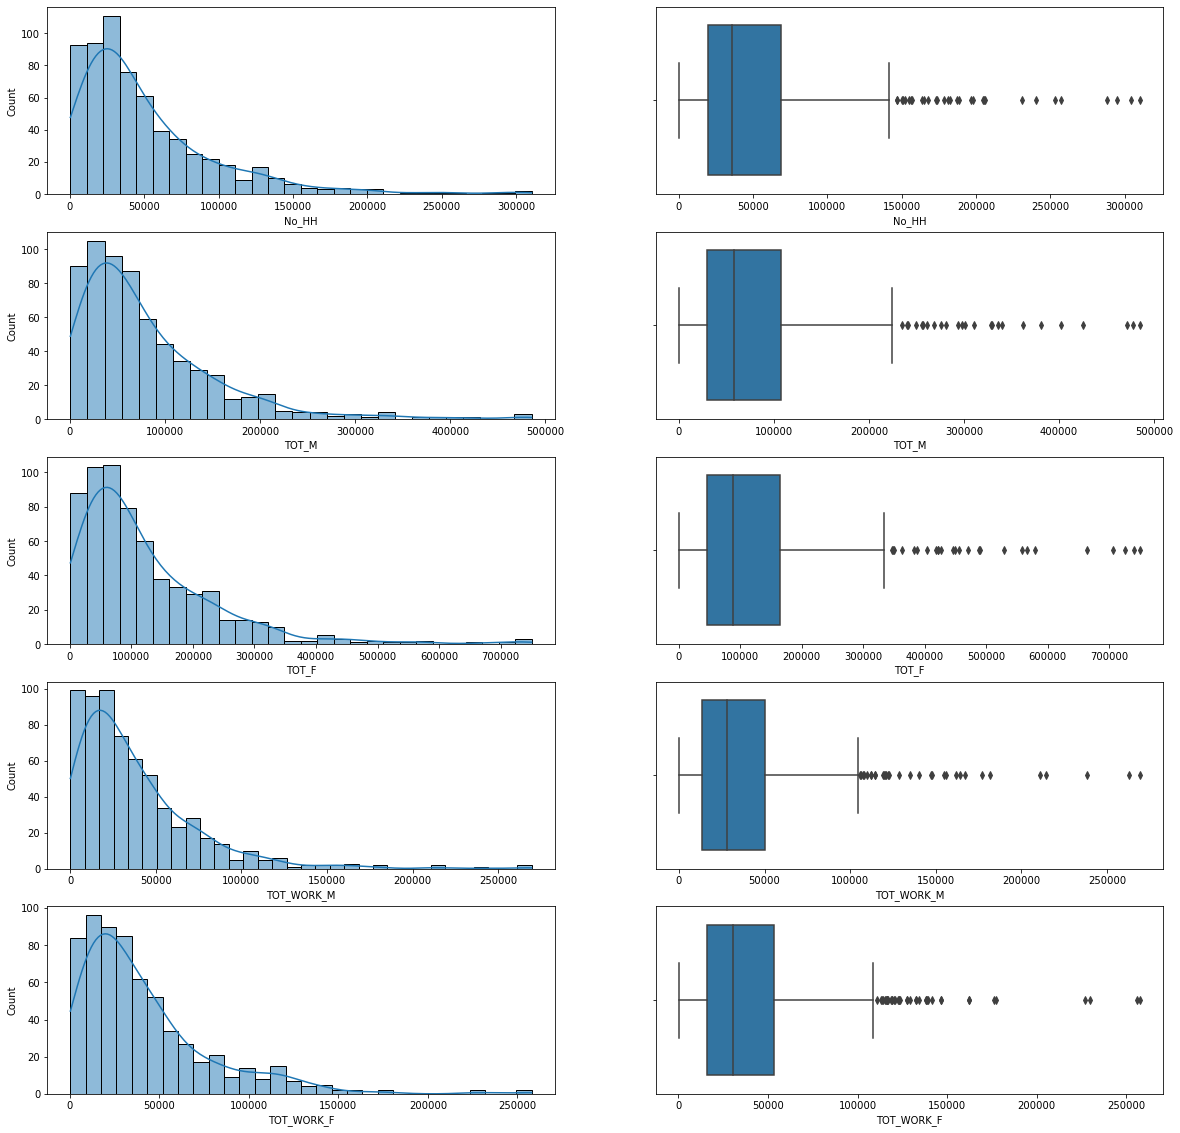

In [66]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,20)
sns.histplot(df['No_HH'], kde=True, ax=axes[0][0])
sns.boxplot(x='No_HH', data=df, ax=axes[0][1])
sns.histplot(df['TOT_M'] , kde=True, ax=axes[1][0])
sns.boxplot(x='TOT_M', data=df , ax=axes[1][1])
sns.histplot(df['TOT_F'], kde=True, ax=axes[2][0])
sns.boxplot(x='TOT_F', data=df, ax=axes[2][1])
sns.histplot(df['TOT_WORK_M'], kde=True, ax=axes[3][0])
sns.boxplot(x='TOT_WORK_M', data=df, ax=axes[3][1])
sns.histplot(df['TOT_WORK_F'], kde=True, ax=axes[4][0])
sns.boxplot(x='TOT_WORK_F', data=df, ax=axes[4][1])
plt.show()

In [67]:
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'TOT_WORK_M', 'TOT_WORK_F']
eda_data = df[selected_variables]

In [68]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(eda_data)

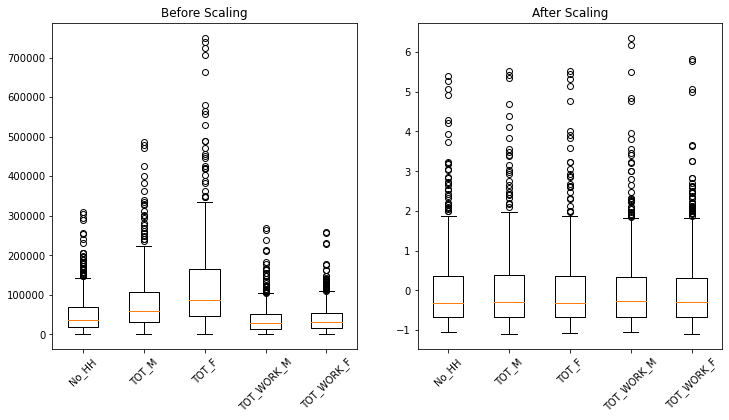

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].boxplot(eda_data.values)
axes[0].set_xticklabels(selected_variables, rotation=45)
axes[0].set_title('Before Scaling')

axes[1].boxplot(scaled_data)
axes[1].set_xticklabels(selected_variables, rotation=45)
axes[1].set_title('After Scaling')
plt.show()

In [70]:
# extract the relevant columns
X = df.iloc[:, 4:].values

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [71]:
pca = PCA()
pca.fit(scaled_data)
covariance_matrix = pca.get_covariance()
explained_variance = pca.explained_variance_ratio_

# Get eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Get the principal components
pca_components = pca.transform(scaled_data)

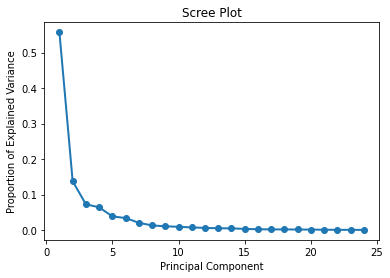

In [72]:
# Perform PCA
pca = PCA(n_components=24)
pca.fit(scaled_data)

# Scree plot
plt.plot(np.arange(1, 25), pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()


In [73]:
# Loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create table of loadings
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12','PC13', 'PC14', 'PC15', 'PC16', 'PC17','PC18','PC19', 'PC20', 'PC21', 'PC22', 'PC23','PC24'],index=df.iloc[:, 4:].columns)

# Show table sorted by PC1 loadings
loading_matrix.sort_values('PC1', ascending=False)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
TOT_M,0.942602,-0.251565,0.115549,-0.038196,-0.049058,-0.102174,0.097123,0.096577,0.014824,-0.017809,...,-0.008771,-0.014398,0.000897,0.009014,0.005160,-0.005615,0.007015,0.013064,-0.001791,-0.005755
TOT_F,0.933778,-0.294305,0.078971,-0.135750,-0.019083,-0.060766,-0.002304,0.076577,0.011713,-0.027650,...,-0.004292,-0.008841,-0.031031,-0.011923,-0.011484,0.010301,-0.009991,-0.031682,0.024410,-0.001792
MARG_CL_3_6_M,0.933487,0.216545,-0.049330,0.177893,0.080322,-0.134639,0.028926,-0.002339,-0.037608,-0.023702,...,0.023672,-0.030410,0.034919,-0.041659,-0.015423,0.019006,-0.018700,-0.005380,-0.014437,0.006920
F_ILL,0.932058,-0.025549,-0.189660,-0.145616,-0.178120,-0.040036,0.030827,0.032301,0.000723,-0.019588,...,-0.054416,0.069563,0.042815,0.044990,0.045479,-0.085204,0.011802,-0.065709,0.068995,-0.030537
MARGWORK_3_6_M,0.930500,-0.123417,0.131294,-0.000049,-0.065112,-0.189695,0.136965,0.119372,-0.005297,-0.087813,...,-0.091634,0.005287,-0.030392,0.012809,0.009890,-0.004576,-0.010969,-0.013330,-0.004032,-0.002292
MARGWORK_M,0.928489,0.260870,-0.017583,0.178168,0.089488,-0.126360,0.021901,0.003557,-0.032405,0.001947,...,0.032235,-0.028332,0.033934,-0.024680,-0.015468,0.008836,-0.016634,-0.003365,-0.007859,0.001070
F_06,0.916932,-0.056864,0.102155,0.028433,-0.065133,-0.215009,0.183372,0.146869,-0.046600,-0.123249,...,-0.090446,0.028676,-0.028938,0.010570,0.024823,0.011392,-0.010423,0.022169,-0.039212,0.007061
M_06,0.914825,-0.061981,0.117772,0.022826,-0.074640,-0.219910,0.179017,0.146987,-0.044597,-0.111624,...,-0.097053,0.022431,-0.029507,0.016445,0.019249,0.004785,-0.011501,0.025854,-0.037466,-0.003071
M_LIT,0.913697,-0.323599,0.167457,-0.067351,-0.013519,-0.077219,0.049816,0.086169,0.035501,-0.004181,...,0.012863,-0.058714,-0.028154,-0.005682,-0.011824,0.012206,0.000571,0.016103,-0.000572,-0.014387
M_ILL,0.912324,-0.018586,-0.044540,0.048552,-0.143463,-0.160431,0.219014,0.114473,-0.045244,-0.054129,...,-0.068739,0.112283,0.082715,0.049386,0.052446,-0.055207,0.024356,0.002943,-0.005017,0.019270
